In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

%matplotlib inline
cf.go_offline()

In [2]:
avo = pd.read_csv('Avocado.csv')

In [3]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
avo.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
avo = avo.drop('Unnamed: 0', axis = 1)

In [6]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
avo['Date'] = pd.to_datetime(avo['Date'])

In [8]:
avo.head(2)

Date  AveragePrice  Total Volume     4046      4225   4770  \
0 2015-12-27          1.33      64236.62  1036.74  54454.85  48.16   
1 2015-12-20          1.35      54876.98   674.28  44638.81  58.33   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany

In [14]:
avo.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

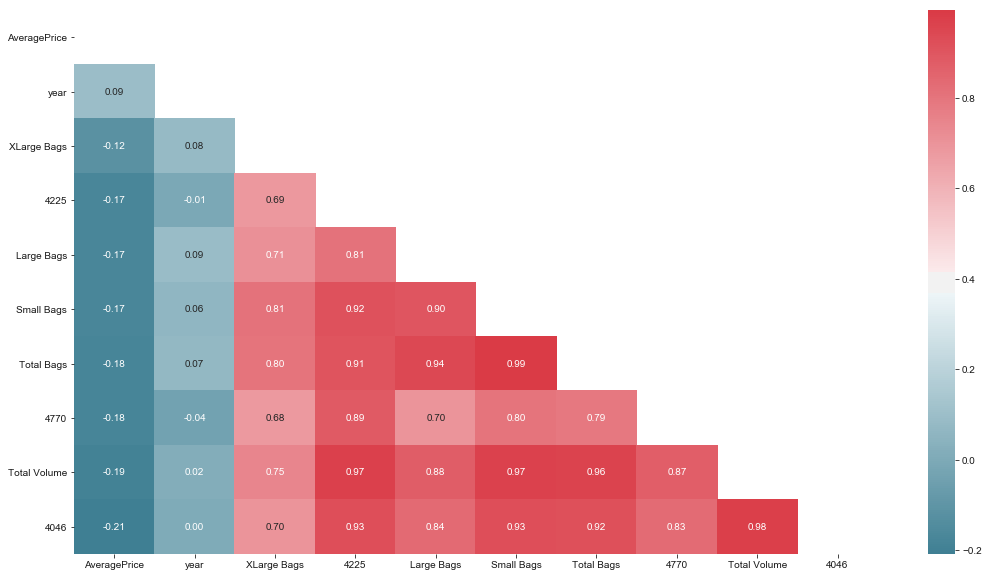

In [16]:
corr = avo.corr()
top_corr_cols = corr.AveragePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

In [27]:
avo.describe().round(8)

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

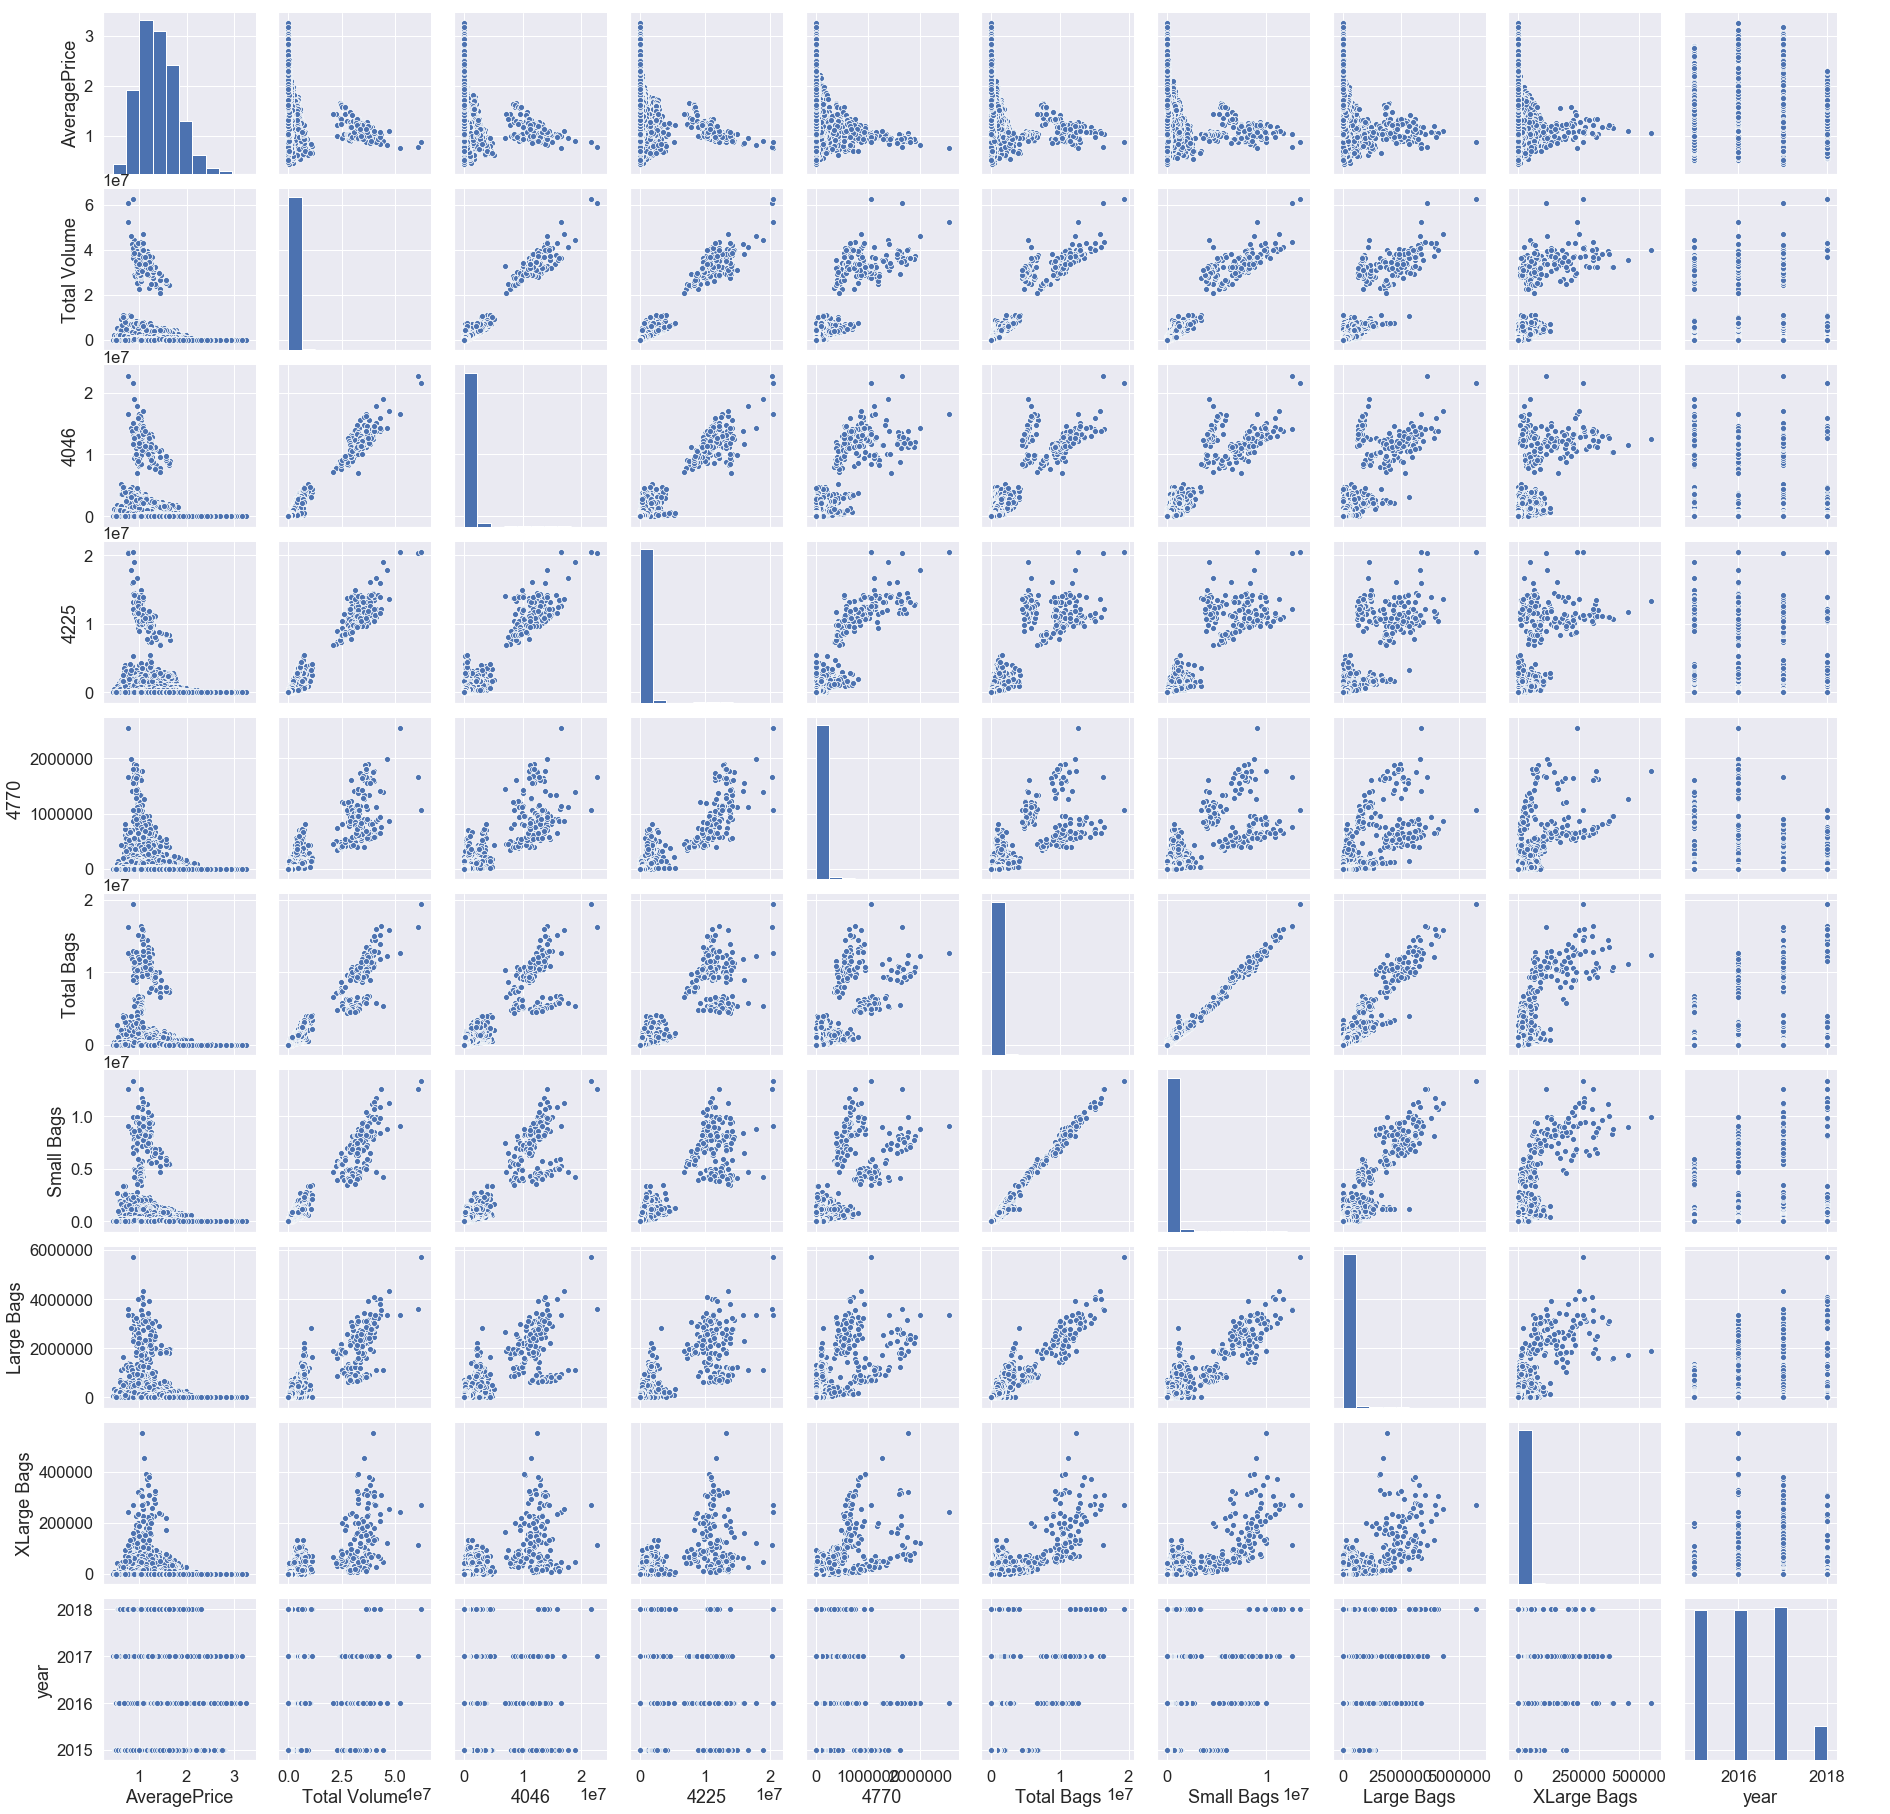

In [19]:
sns.pairplot(avo)

In [30]:
Q1 = avo.quantile(0.25)
Q3 = avo.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
year                 2.00
dtype: float64


In [32]:
print((avo.drop('Date',axis = 1) < (Q1 - 1.5*IQR)) | (avo.drop('Date',axis = 1) > (Q3 + 1.5*IQR)))

        4046   4225   4770  AveragePrice  Large Bags  Small Bags  Total Bags  \
0      False  False  False         False       False       False       False   
1      False  False  False         False       False       False       False   
2      False  False  False         False       False       False       False   
3      False  False  False         False       False       False       False   
4      False  False  False         False       False       False       False   
...      ...    ...    ...           ...         ...         ...         ...   
18244  False  False  False         False       False       False       False   
18245  False  False  False         False       False       False       False   
18246  False  False  False         False       False       False       False   
18247  False  False  False         False       False       False       False   
18248  False  False  False         False       False       False       False   

       Total Volume  XLarge Bags  regio

In [74]:
avo_out = avo[~((avo.drop('Date',axis = 1) < (Q1 - 1.5*IQR)) | (avo.drop('Date',axis = 1) > (Q3 + 1.5*IQR))).any(axis = 1)]

In [75]:
avo_out.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [76]:
avo_out.describe()

AveragePrice   Total Volume           4046           4225  \
count  11538.000000   11538.000000   11538.000000   11538.000000   
mean       1.529875   73959.320578   19059.517078   28309.994341   
std        0.356502  108419.105167   42178.274391   55526.062604   
min        0.480000      84.560000       0.000000       0.000000   
25%        1.260000    6442.560000     291.677500    1201.500000   
50%        1.520000   18532.080000    1757.145000    5040.660000   
75%        1.780000  102662.110000   11535.650000   29592.505000   
max        2.490000  783913.050000  276253.480000  369810.830000   

               4770     Total Bags     Small Bags    Large Bags   XLarge Bags  \
count  11538.000000   11538.000000   11538.000000  11538.000000  11538.000000   
mean     846.948754   25741.040382   20686.784972   5046.904171      7.350632   
std     2361.849292   34310.418695   30179.910998   9672.040893     34.658052   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%        0.000000    2454.782500    1164.347500     10.000000      0.000000   
50%        4.950000    8745.835000    6266.935000    689.595000      0.000000   
75%      277.170000   40642.267500   29876.017500   4734.025000      0.000000   
max    15574.430000  251715.310000  203830.160000  54774.640000    329.390000   

               year  
count  11538.000000  
mean    2016.085630  
std        0.943006  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [77]:
avo_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 18248
Data columns (total 13 columns):
Date            11538 non-null datetime64[ns]
AveragePrice    11538 non-null float64
Total Volume    11538 non-null float64
4046            11538 non-null float64
4225            11538 non-null float64
4770            11538 non-null float64
Total Bags      11538 non-null float64
Small Bags      11538 non-null float64
Large Bags      11538 non-null float64
XLarge Bags     11538 non-null float64
type            11538 non-null object
year            11538 non-null int64
region          11538 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.2+ MB


In [42]:
pt = px.box(avo_out,'year','AveragePrice')


In [43]:
pt.show()

In [44]:
px.box(avo_out,'year','Total Volume')

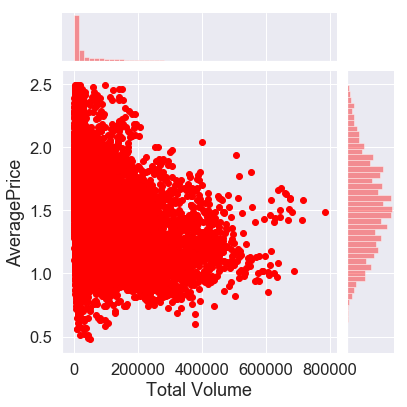

In [47]:
sns.jointplot('Total Volume','AveragePrice', data= avo_out,color='red')

In [50]:
ps = px.scatter(avo_out, x='AveragePrice', y = 'Total Volume', color = 'year' , size = 'AveragePrice')
ps.update_traces(marker=dict(line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

In [181]:
avo_type = avo[~((avo.drop('Date',axis = 1) < (Q1 - 1.5*IQR)) | (avo.drop('Date',axis = 1) > (Q3 + 1.5*IQR))).any(axis = 1)]['type']

In [183]:
avo_type = avo_type.dropna()

In [184]:
avo_out = pd.concat([avo_out,avo_type], axis = 1)

In [185]:
avo_out.head()

4046       4225    4770  AveragePrice       Date  Large Bags  \
0  1036.74   54454.85   48.16          1.33 2015-12-27       93.25   
1   674.28   44638.81   58.33          1.35 2015-12-20       97.49   
2   794.70  109149.67  130.50          0.93 2015-12-13      103.14   
3  1132.00   71976.41   72.58          1.08 2015-12-06      133.76   
4   941.48   43838.39   75.78          1.28 2015-11-29      197.69   

   Small Bags  Total Bags  Total Volume  XLarge Bags    year  conventional  \
0     8603.62     8696.87      64236.62          0.0  2015.0             1   
1     9408.07     9505.56      54876.98          0.0  2015.0             1   
2     8042.21     8145.35     118220.22          0.0  2015.0             1   
3     5677.40     5811.16      78992.15          0.0  2015.0             1   
4     5986.26     6183.95      51039.60          0.0  2015.0             1   

   organic          type  
0        0  conventional  
1        0  conventional  
2        0  conventional  
3        0  conventional  
4        0  conventional

In [187]:
avo_out['type'].value_counts()

organic         8631
conventional    2907
Name: type, dtype: int64

In [186]:
px.box(avo_out,x = 'year', y = 'Total Volume', color='type')

# Linear Reg

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [62]:
sc = StandardScaler()

In [66]:
avo_out['type'].value_counts()

organic         8631
conventional    2907
Name: type, dtype: int64

In [67]:
avo_out['region'].value_counts()

Spokane                320
Boise                  317
Syracuse               309
Pittsburgh             307
Albany                 304
StLouis                297
Roanoke                295
RichmondNorfolk        295
HarrisburgScranton     291
BuffaloRochester       290
Philadelphia           282
HartfordSpringfield    277
Jacksonville           274
Nashville              257
LasVegas               255
Orlando                252
NorthernNewEngland     250
NewOrleansMobile       248
Louisville             248
Columbus               240
Tampa                  237
SouthCarolina          236
Sacramento             228
Indianapolis           223
GrandRapids            222
Charlotte              212
RaleighGreensboro      210
Boston                 205
MiamiFtLauderdale      190
Seattle                188
Detroit                188
Atlanta                181
SanDiego               180
CincinnatiDayton       178
Portland               173
BaltimoreWashington    173
SouthCentral           169
P

In [82]:
typedum = pd.get_dummies(avo_out['type'])
typedum.head()

conventional  organic
0             1        0
1             1        0
2             1        0
3             1        0
4             1        0

In [87]:
avo_out = pd.concat([avo_out,typedum], axis = 1)

In [88]:
avo_out.head()

4046       4225    4770  AveragePrice       Date  Large Bags  \
0  1036.74   54454.85   48.16          1.33 2015-12-27       93.25   
1   674.28   44638.81   58.33          1.35 2015-12-20       97.49   
2   794.70  109149.67  130.50          0.93 2015-12-13      103.14   
3  1132.00   71976.41   72.58          1.08 2015-12-06      133.76   
4   941.48   43838.39   75.78          1.28 2015-11-29      197.69   

   Small Bags  Total Bags  Total Volume  XLarge Bags  region          type  \
0     8603.62     8696.87      64236.62          0.0  Albany  conventional   
1     9408.07     9505.56      54876.98          0.0  Albany  conventional   
2     8042.21     8145.35     118220.22          0.0  Albany  conventional   
3     5677.40     5811.16      78992.15          0.0  Albany  conventional   
4     5986.26     6183.95      51039.60          0.0  Albany  conventional   

     year  conventional  organic  
0  2015.0             1        0  
1  2015.0             1        0  
2  2015.0             1        0  
3  2015.0             1        0  
4  2015.0             1        0

In [89]:
avo_out = avo_out.drop('region',axis = 1)

In [90]:
avo_out.head()

4046       4225    4770  AveragePrice       Date  Large Bags  \
0  1036.74   54454.85   48.16          1.33 2015-12-27       93.25   
1   674.28   44638.81   58.33          1.35 2015-12-20       97.49   
2   794.70  109149.67  130.50          0.93 2015-12-13      103.14   
3  1132.00   71976.41   72.58          1.08 2015-12-06      133.76   
4   941.48   43838.39   75.78          1.28 2015-11-29      197.69   

   Small Bags  Total Bags  Total Volume  XLarge Bags          type    year  \
0     8603.62     8696.87      64236.62          0.0  conventional  2015.0   
1     9408.07     9505.56      54876.98          0.0  conventional  2015.0   
2     8042.21     8145.35     118220.22          0.0  conventional  2015.0   
3     5677.40     5811.16      78992.15          0.0  conventional  2015.0   
4     5986.26     6183.95      51039.60          0.0  conventional  2015.0   

   conventional  organic  
0             1        0  
1             1        0  
2             1        0  
3             1        0  
4             1        0

In [91]:
avo_out = avo_out.drop('type', axis = 1)

In [114]:
avo_out = avo_out.dropna()

In [115]:
print(avo_out.isnull().sum())

4046            0
4225            0
4770            0
AveragePrice    0
Date            0
Large Bags      0
Small Bags      0
Total Bags      0
Total Volume    0
XLarge Bags     0
year            0
conventional    0
organic         0
dtype: int64


In [116]:
avo_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 18248
Data columns (total 13 columns):
4046            11538 non-null float64
4225            11538 non-null float64
4770            11538 non-null float64
AveragePrice    11538 non-null float64
Date            11538 non-null datetime64[ns]
Large Bags      11538 non-null float64
Small Bags      11538 non-null float64
Total Bags      11538 non-null float64
Total Volume    11538 non-null float64
XLarge Bags     11538 non-null float64
year            11538 non-null float64
conventional    11538 non-null uint8
organic         11538 non-null uint8
dtypes: datetime64[ns](1), float64(10), uint8(2)
memory usage: 1.1 MB


In [117]:
sc.fit(avo_out.drop(['Date','AveragePrice'], axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [118]:
avo_scaled = sc.transform(avo_out.drop(['Date','AveragePrice'], axis =1))

In [119]:
avo_scaled = pd.DataFrame(avo_scaled,columns=['4046','4225','4770','Large Bags','Small Bags','Total Bags','Total Volume','XL Bags','year','conventional','organic'])

In [120]:
avo_scaled.head()

4046      4225      4770  Large Bags  Small Bags  Total Bags  \
0 -0.427319  0.470878 -0.338219   -0.512184   -0.400388   -0.496785   
1 -0.435912  0.294088 -0.333913   -0.511746   -0.373732   -0.473214   
2 -0.433057  1.455950 -0.303355   -0.511162   -0.418991   -0.512860   
3 -0.425060  0.786447 -0.327880   -0.507996   -0.497352   -0.580895   
4 -0.429577  0.279672 -0.326525   -0.501386   -0.487117   -0.570029   

   Total Volume   XL Bags      year  conventional  organic  
0     -0.089681 -0.212099 -1.151294       1.72309 -1.72309  
1     -0.176013 -0.212099 -1.151294       1.72309 -1.72309  
2      0.408257 -0.212099 -1.151294       1.72309 -1.72309  
3      0.046422 -0.212099 -1.151294       1.72309 -1.72309  
4     -0.211408 -0.212099 -1.151294       1.72309 -1.72309

In [121]:
print(avo_scaled.isnull().sum())

4046            0
4225            0
4770            0
Large Bags      0
Small Bags      0
Total Bags      0
Total Volume    0
XL Bags         0
year            0
conventional    0
organic         0
dtype: int64


In [122]:
X_train, X_test, y_train, y_test = train_test_split(avo_scaled,avo_out['AveragePrice'], test_size=0.3, random_state=101)

In [123]:
lr = LinearRegression()

In [124]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lr_pred = lr.predict(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
type(y_test)

pandas.core.series.Series

In [129]:
type(lr_pred)

numpy.ndarray

In [130]:
from sklearn import utils

In [131]:
print(utils.multiclass.type_of_target(y_test))

continuous


In [132]:
print(utils.multiclass.type_of_target(lr_pred))

continuous


In [134]:
from sklearn.metrics import accuracy_score

In [136]:
lr_pred_ser = pd.Series(lr_pred)

In [143]:
y_test.shape

(3462, 1)

In [145]:
lr_pred.shape

(3462, 1)

In [140]:
y_test = pd.DataFrame(y_test)
lr_pred = pd.DataFrame(lr_pred_ser)

In [147]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [148]:
print('Mean Absolute Error:')
mean_absolute_error(y_test,lr_pred)

Mean Absolute Error:


0.2344955225819342

In [149]:
print('Mean Squared error:',mean_squared_error(y_test,lr_pred))

Mean Squared error: 0.08924025392521821


In [150]:
print('R2 Score', r2_score(y_test,lr_pred))

R2 Score 0.29654591722720114


In [159]:
print('Root Mean Sqared Error:',np.sqrt(mean_squared_error(y_test,lr_pred)))

Root Mean Sqared Error: 0.29873107291545387


## Random Forest Reg

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rfr = RandomForestRegressor()

In [154]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [155]:
rfr_pred = rfr.predict(X_test)

In [161]:
print('Mean Absolute Error:\t',mean_absolute_error(y_test,rfr_pred),'\n',
      'Mean Squared Error:\t',mean_squared_error(y_test,rfr_pred),'\n','R2 Score:\t',r2_score(y_test,rfr_pred),'\n',
     'Root Mean Sqared Error\t:',np.sqrt(mean_squared_error(y_test,rfr_pred)))

Mean Absolute Error:	 0.13698844598497978 
 Mean Squared Error:	 0.03618000751010976 
 R2 Score:	 0.7148038818999247 
 Root Mean Sqared Error	: 0.19021042955135178


# SVR

In [162]:
from sklearn.svm import SVR

In [163]:
svr = SVR()

In [164]:
svr.fit(X_train,y_train)

C:\Users\preet\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [165]:
svr_pred = svr.predict(X_test)

In [166]:
print('Mean Absolute Error:\t',mean_absolute_error(y_test,svr_pred),'\n',
      'Mean Squared Error:\t',mean_squared_error(y_test,svr_pred),'\n','R2 Score:\t',r2_score(y_test,svr_pred),'\n',
     'Root Mean Sqared Error\t:',np.sqrt(mean_squared_error(y_test,svr_pred)))

Mean Absolute Error:	 0.19101775319974443 
 Mean Squared Error:	 0.0615885057693323 
 R2 Score:	 0.5145163317036477 
 Root Mean Sqared Error	: 0.2481703160519652


# GRID SEARCH CV

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [169]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\preet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   1.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   1.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   1.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   1.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [170]:
grid_pred = grid.predict(X_test)

In [171]:
print('Mean Absolute Error:\t',mean_absolute_error(y_test,grid_pred),'\n',
      'Mean Squared Error:\t',mean_squared_error(y_test,grid_pred),'\n','R2 Score:\t',r2_score(y_test,grid_pred),'\n',
     'Root Mean Sqared Error\t:',np.sqrt(mean_squared_error(y_test,grid_pred)))

Mean Absolute Error:	 0.16769041828927417 
 Mean Squared Error:	 0.04925950652910847 
 R2 Score:	 0.6117021247797849 
 Root Mean Sqared Error	: 0.22194482766919454


# Keras

In [188]:
import tensorflow as tf

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [194]:
root_mean_squared_error = tf.keras.metrics.RootMeanSquaredError

In [195]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='softmax'))

model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [196]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 15ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0

Epoch 25/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 26/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 27/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 28/200
32/32 [==============================] - 0s 5

32/32 [==============================] - 0s 5ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 78/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 79/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 80/200
32/32 [==============================] - 0s 4ms/step - los

32/32 [==============================] - 0s 5ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 130/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 131/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 132/200
32/32 [==============================] - 0s 5ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 182/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 183/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4106 - mean_squared_error: 0.4106 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 32.3859 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 184/200
32/32 [==============================] - 0s 4ms/step - 

In [197]:
losses = pd.DataFrame(model.history.history)

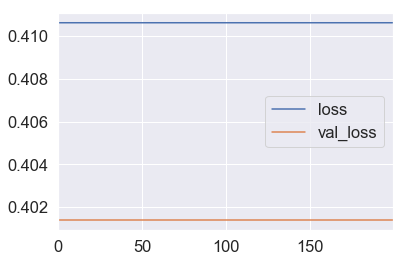

In [198]:
losses[['loss','val_loss']].plot()

In [199]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [200]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 9ms/step - loss: 1.0558 - mean_squared_error: 1.0558 - mean_absolute_error: 0.9542 - mean_absolute_percentage_error: 60.1289 - val_loss: 0.8867 - val_mean_squared_error: 0.8867 - val_mean_absolute_error: 0.8733 - val_mean_absolute_percentage_error: 54.8390
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.9678 - mean_squared_error: 0.9678 - mean_absolute_error: 0.9029 - mean_absolute_percentage_error: 56.6345 - val_loss: 0.

Epoch 25/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5691 - mean_squared_error: 0.5691 - mean_absolute_error: 0.6533 - mean_absolute_percentage_error: 39.6692 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0991
Epoch 26/200
32/32 [==============================] - 0s 4ms/step - loss: 0.5601 - mean_squared_error: 0.5601 - mean_absolute_error: 0.6472 - mean_absolute_percentage_error: 39.2537 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0991
Epoch 27/200
32/32 [==============================] - 0s 4ms/step - loss: 0.5586 - mean_squared_error: 0.5586 - mean_absolute_error: 0.6472 - mean_absolute_percentage_error: 39.2701 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 28/200
32/32 [==============================] - 0s 4

32/32 [==============================] - 0s 4ms/step - loss: 0.4503 - mean_squared_error: 0.4503 - mean_absolute_error: 0.5747 - mean_absolute_percentage_error: 34.3431 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 78/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4512 - mean_squared_error: 0.4512 - mean_absolute_error: 0.5756 - mean_absolute_percentage_error: 34.4152 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 79/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4499 - mean_squared_error: 0.4499 - mean_absolute_error: 0.5742 - mean_absolute_percentage_error: 34.3065 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 80/200
32/32 [==============================] - 0s 4ms/step - los

32/32 [==============================] - 0s 4ms/step - loss: 0.4281 - mean_squared_error: 0.4281 - mean_absolute_error: 0.5586 - mean_absolute_percentage_error: 33.2637 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 130/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4278 - mean_squared_error: 0.4278 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 33.2452 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 131/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4271 - mean_squared_error: 0.4271 - mean_absolute_error: 0.5580 - mean_absolute_percentage_error: 33.2337 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 132/200
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 32.8107 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 182/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4196 - mean_squared_error: 0.4196 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 32.8279 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 183/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4185 - mean_squared_error: 0.4185 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 32.8033 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 184/200
32/32 [==============================] - 0s 5ms/step - 

In [201]:
losses = pd.DataFrame(model.history.history)

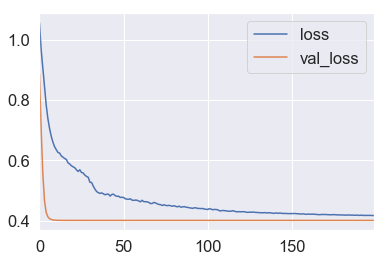

In [202]:
losses[['loss','val_loss']].plot()

In [209]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [210]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [211]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          callbacks = [early_stop],
          validation_data=(X_test, y_test), 
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

253/253 [==============================] - 1s 3ms/step - loss: 0.8574 - mean_squared_error: 0.8574 - mean_absolute_error: 0.8340 - mean_absolute_percentage_error: 51.8438 - val_loss: 0.4259 - val_mean_squared_error: 0.4259 - val_mean_absolute_error: 0.5575 - val_mean_absolute_percentage_error: 33.3876
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.6321 - mean_squared_error: 0.6321 - mean_absolute_error: 0.6939 - mean_absolute_percentage_error: 42.4137 - val_loss

Epoch 25/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4207 - mean_squared_error: 0.4207 - mean_absolute_error: 0.5531 - mean_absolute_percentage_error: 32.8985 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 26/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4202 - mean_squared_error: 0.4202 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 32.8818 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 27/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4194 - mean_squared_error: 0.4194 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 32.8287 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 28/100
253/253 [==============================

In [212]:
losses = pd.DataFrame(model.history.history)

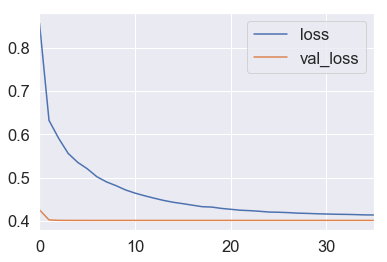

In [213]:
losses[['loss','val_loss']].plot()

In [217]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [218]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [219]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          callbacks = [early_stop],
          validation_data=(X_test, y_test), 
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

253/253 [==============================] - 1s 3ms/step - loss: 1.1899 - mean_squared_error: 1.1899 - mean_absolute_error: 1.0304 - mean_absolute_percentage_error: 65.4810 - val_loss: 1.0507 - val_mean_squared_error: 1.0507 - val_mean_absolute_error: 0.9613 - val_mean_absolute_percentage_error: 60.8314
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 1.0179 - mean_squared_error: 1.0179 - mean_absolute_error: 0.9444 - mean_absolute_percentage_error: 59.3802 - val_loss

Epoch 25/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4366 - mean_squared_error: 0.4366 - mean_absolute_error: 0.5661 - mean_absolute_percentage_error: 33.7244 - val_loss: 0.4255 - val_mean_squared_error: 0.4255 - val_mean_absolute_error: 0.5571 - val_mean_absolute_percentage_error: 33.3568
Epoch 26/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4339 - mean_squared_error: 0.4339 - mean_absolute_error: 0.5639 - mean_absolute_percentage_error: 33.5842 - val_loss: 0.4230 - val_mean_squared_error: 0.4230 - val_mean_absolute_error: 0.5550 - val_mean_absolute_percentage_error: 33.2250
Epoch 27/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4315 - mean_squared_error: 0.4315 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 33.4599 - val_loss: 0.4208 - val_mean_squared_error: 0.4208 - val_mean_absolute_error: 0.5532 - val_mean_absolute_percentage_error: 33.1101
Epoch 28/100
253/253 [==============================

Epoch 76/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4107 - mean_squared_error: 0.4107 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 32.3921 - val_loss: 0.4015 - val_mean_squared_error: 0.4015 - val_mean_absolute_error: 0.5374 - val_mean_absolute_percentage_error: 32.1049
Epoch 77/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4107 - mean_squared_error: 0.4107 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 32.3915 - val_loss: 0.4015 - val_mean_squared_error: 0.4015 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.1043
Epoch 78/100
253/253 [==============================] - 1s 2ms/step - loss: 0.4107 - mean_squared_error: 0.4107 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 32.3909 - val_loss: 0.4015 - val_mean_squared_error: 0.4015 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.1038
Epoch 79/100
253/253 [==============================

In [220]:
losses = pd.DataFrame(model.history.history)

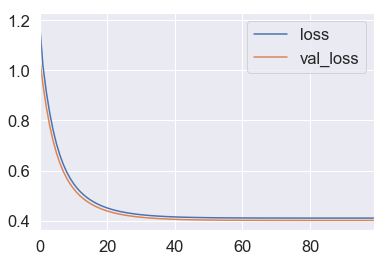

In [221]:
losses[['loss','val_loss']].plot()

In [222]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)

In [223]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

In [224]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          callbacks = [early_stop],
          validation_data=(X_test, y_test), 
          )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

253/253 [==============================] - 1s 3ms/step - loss: 0.8961 - mean_squared_error: 0.8961 - mean_absolute_error: 0.8576 - mean_absolute_percentage_error: 53.3858 - val_loss: 0.4347 - val_mean_squared_error: 0.4347 - val_mean_absolute_error: 0.5650 - val_mean_absolute_percentage_error: 33.8775
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.6023 - mean_squared_error: 0.6023 - mean_absolute_error: 0.6743 - mean_absolute_percentage_error: 41.1033 - val_loss

Epoch 25/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4218 - mean_squared_error: 0.4218 - mean_absolute_error: 0.5540 - mean_absolute_percentage_error: 32.9553 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 26/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4204 - mean_squared_error: 0.4204 - mean_absolute_error: 0.5529 - mean_absolute_percentage_error: 32.8835 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 27/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4194 - mean_squared_error: 0.4194 - mean_absolute_error: 0.5522 - mean_absolute_percentage_error: 32.8403 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_mean_absolute_error: 0.5373 - val_mean_absolute_percentage_error: 32.0990
Epoch 28/100
253/253 [==============================

In [225]:
losses = pd.DataFrame(model.history.history)

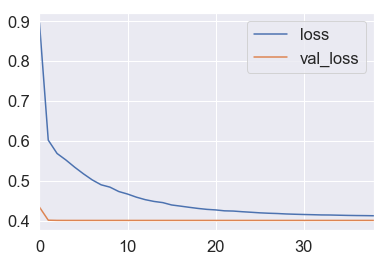

In [226]:
losses[['loss','val_loss']].plot()